### Importação das bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

### Análise Exploratória de Dados

##### Leitura inicial

In [2]:
df = pd.read_csv("UCI_Credit_Card.csv")
df.shape

(30000, 25)

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

São 30.000 clientes de cartão de crédito e com a função "describe" conseguimos notar alguns insights:
- O sexo predominante é feminino (mean 1.60).
- A média da idade é de 35 anos com um desvio de 9.2 anos (26 a 44 anos), o que mostra um público jovem-adulto ativo.
- O maior limite de crédito (máx) é de 1.000.000$ e o 75% é 240.000$, é um exemplo de outlier extremo, faz com que a média seja maior que a mediana: os "muito-ricos" trazem a média para cima.
- Cerca de 78% das pessoas pagaram o próximo mês, nosso foco é os 22% (default 0.22)
- A média do PAY_0 é negativa, a maioria das pessoas paga adiantado ou no dia.
- [Dados sujos] MARRIAGE e EDUCATION mostram min: 0, mas suas categorias começam a partir de 1, será necessário imputação dos valores.
- Não há ocorrência de dados faltantes (NaN).

In [7]:
sujos = ['EDUCATION', 'MARRIAGE']
for i in sujos:
    print(df[i].value_counts())
porcent_edu = (df.EDUCATION == 0).sum()/(df.shape[0])
porcent_mar = (df.MARRIAGE == 0).sum()/(df.shape[0])
print(f"\nPorcentagem de variável 0 em EDUCATION: {100 * porcent_edu:.2f}% e MARRIAGE: {100 * porcent_mar:.2f}%.")

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64
MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

Porcentagem de variável 0 em EDUCATION: 0.05% e MARRIAGE: 0.18%.


A estratégia é agrupar categoria 5, 6 e 0 de EDUCATION, e 0 de MARRIAGE em "Others"

In [8]:
df.loc[df.EDUCATION.isin([0, 5, 6]), 'EDUCATION'] = 4
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
for i in sujos:
    print(df[i].value_counts())
print(f'\n✅ DADOS LIMPOS')

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64
MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

✅ DADOS LIMPOS


#### [EDA] Análise Exploratória de Dados

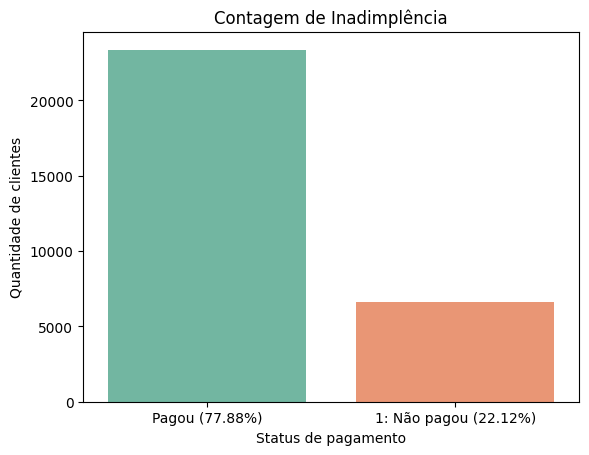

In [9]:
sns.countplot(x='default.payment.next.month', data=df, palette='Set2')
df1_mean = df['default.payment.next.month'].mean() * 100
df0_mean = 100 - df1_mean

plt.title('Contagem de Inadimplência')
plt.ylabel('Quantidade de clientes')
plt.xlabel('Status de pagamento')
plt.xticks([0, 1], [f'Pagou ({df0_mean}%)', f'1: Não pagou ({df1_mean}%)'])
plt.show()

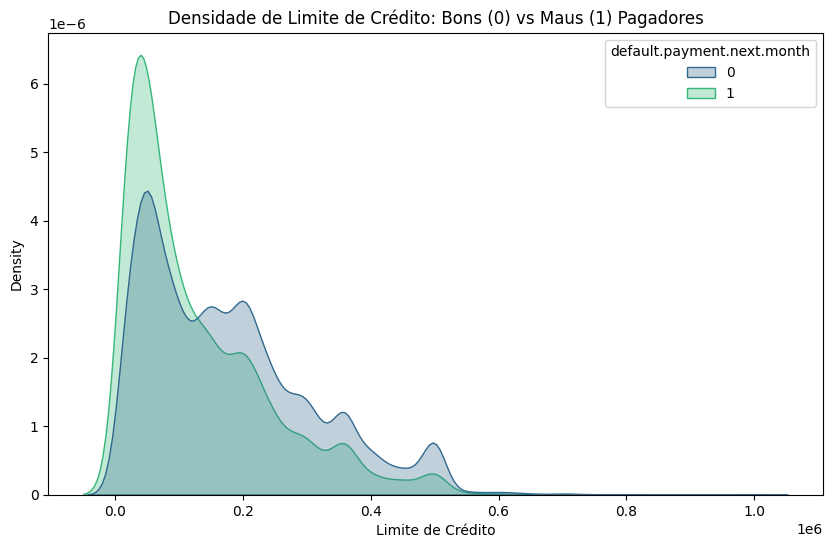

In [10]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='LIMIT_BAL', hue='default.payment.next.month', 
            fill=True, common_norm=False, palette='viridis', alpha=0.3)
plt.title('Densidade de Limite de Crédito: Bons (0) vs Maus (1) Pagadores')
plt.xlabel('Limite de Crédito')
plt.show()

Apesar da sobreposição significativa, a densidade de defaults (curva verde) é claramente maior em limites baixos (0-100k). Isso sugere que o risco é inversamente proporcional ao limite concedido.

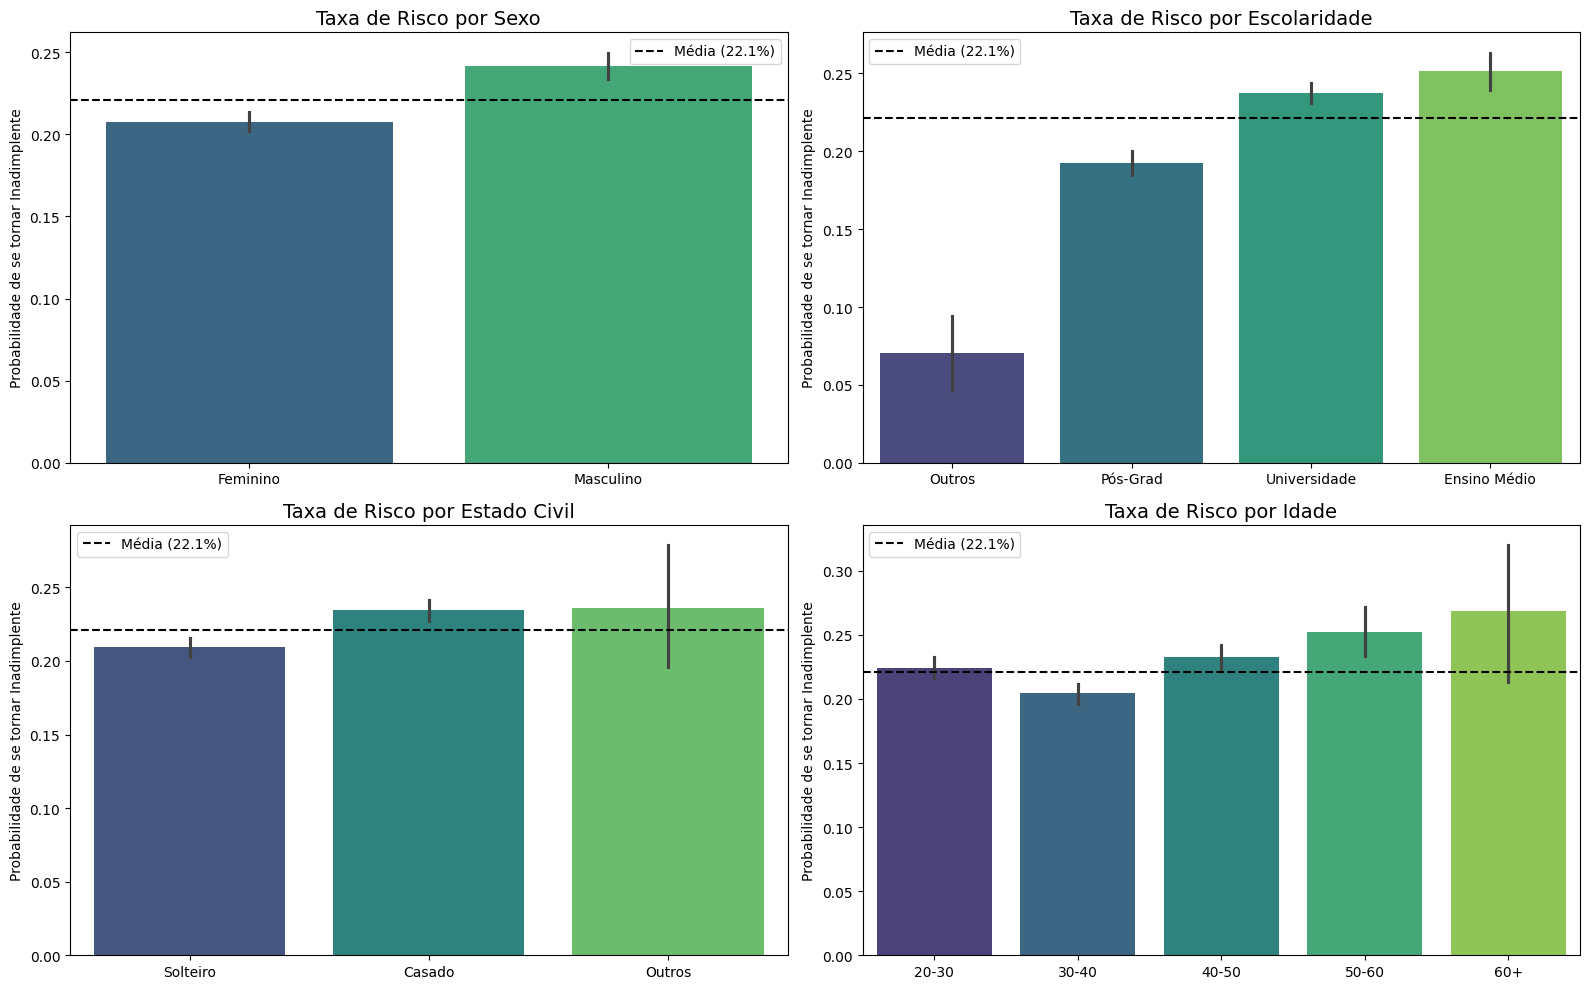

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df.rename(columns={'SEX':'Sexo'}, inplace=True)
df.rename(columns={'EDUCATION':'Escolaridade'}, inplace=True)
df.rename(columns={'MARRIAGE':'Estado Civil'}, inplace=True)
df['Idade'] = pd.cut(df['AGE'], bins=[20, 30, 40, 50, 60, 80], labels=['20-30', '30-40', '40-50', '50-60', '60+'])

plots_config = [
    {'col': 'Sexo', 'labels': ['Masculino', 'Feminino']},
    {'col': 'Escolaridade', 'labels': ['Pós-Grad', 'Universidade', 'Ensino Médio', 'Outros']},
    {'col': 'Estado Civil', 'labels': ['Casado', 'Solteiro', 'Outros']},
    {'col': 'Idade', 'labels': None}]


fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

media_geral = df['default.payment.next.month'].mean()

for i, config in enumerate(plots_config):
    col = config['col']
    ax = axes[i] 
    if col == 'Idade':
        order = ['20-30', '30-40', '40-50', '50-60', '60+']
    else:
        order = df.groupby(col)['default.payment.next.month'].mean().sort_values().index

    sns.barplot(x=col, y='default.payment.next.month', data=df, 
        order=order, palette='viridis', ax=ax)
    
    ax.axhline(media_geral, color='k', linestyle='--', label=f'Média ({media_geral:.1%})')
    ax.set_title(f'Taxa de Risco por {col}', fontsize=14)
    ax.set_ylabel('Probabilidade de se tornar Inadimplente')
    ax.set_xlabel('')
    ax.legend()

    if config['labels']:
        new_labels = []
        for val in order:
            idx = int(val) - 1
            
            if 0 <= idx < len(config['labels']):
                new_labels.append(config['labels'][idx])
            else:
                new_labels.append(f'Outros ({val})')
        ax.set_xticklabels(new_labels)

plt.tight_layout()
plt.show()

O grupo mais seguro não são os mais velhos, mas sim os adultos jovens (30-40 anos), que estão significativamente abaixo da linha de risco. O risco sobe drasticamente para idosos (60+), provavelmente devido à restrição de renda na aposentadoria. Casados apresentam um risco maior que a média e maior que os solteiros, isso sugere que o custo familiar pode estar pesando no orçamento, gerando inadimplência.

Existe também uma escada clara de risco baseada na educação. Clientes com apenas Ensino Médio são os mais perigosos (barra verde clara, bem acima da linha média). Conforme a escolaridade sobe para Universidade e Pós-Graduação, o risco cai degrau por degrau. Isso valida a hipótese de que maior escolaridade correlaciona com maior estabilidade financeira ou empregabilidade.

Embora seja uma diferença menor, é visível: Homens (Masculino) estão acima da linha de risco, enquanto Mulheres (Feminino) estão abaixo. Mulheres, nesta base, honram melhor seus compromissos.

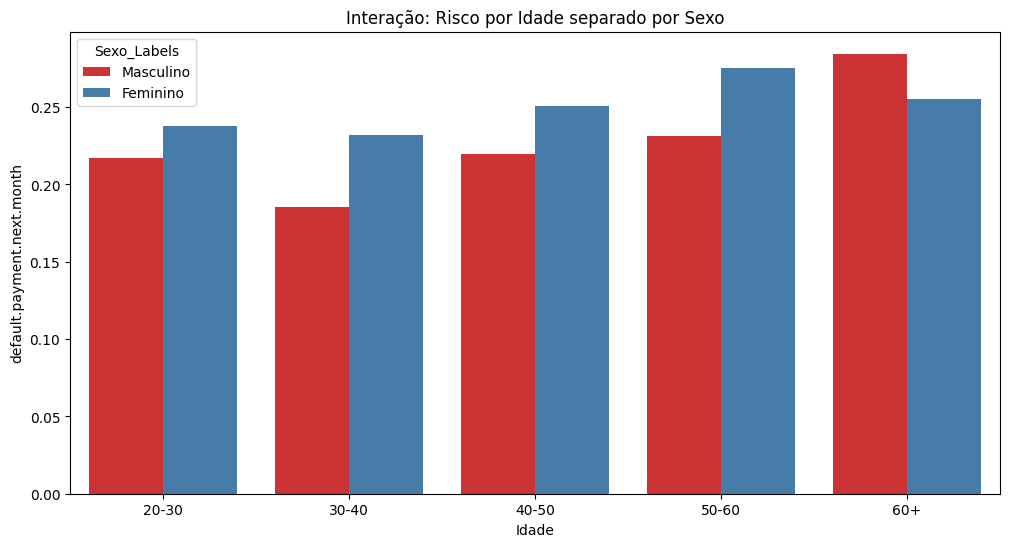

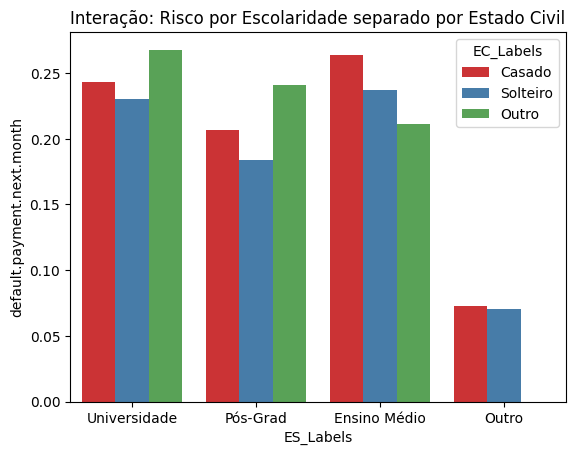

In [23]:
df['Sexo_Labels'] = df['Sexo'].map({1: 'Feminino', 2: 'Masculino'})
plt.figure(figsize=(12, 6))
sns.barplot(x='Idade', y='default.payment.next.month', hue='Sexo_Labels', palette='Set1', data=df, errorbar=None)
plt.title('Interação: Risco por Idade separado por Sexo')
plt.show()

df['EC_Labels'] = df['Estado Civil'].map({1: 'Casado', 2: 'Solteiro', 3: 'Outro'})
df['ES_Labels'] = df['Escolaridade'].map({1: 'Pós-Grad', 2: 'Universidade', 3: 'Ensino Médio', 4: 'Outro'})
sns.barplot(x='ES_Labels', y='default.payment.next.month', hue='EC_Labels', palette='Set1', data=df, errorbar=None)
plt.title('Interação: Risco por Escolaridade separado por Estado Civil')
plt.show()

Agora na visão macro:
1. Homens parecem mais arriscados até acima de 60 anos, onde possuem o mesmo risco que mulheres, sugerindo que o problema está concentrado nos homens jovens. 
2. O risco permanece em casados, evidenciando essa provável dificuldade em sustento, gerando default.

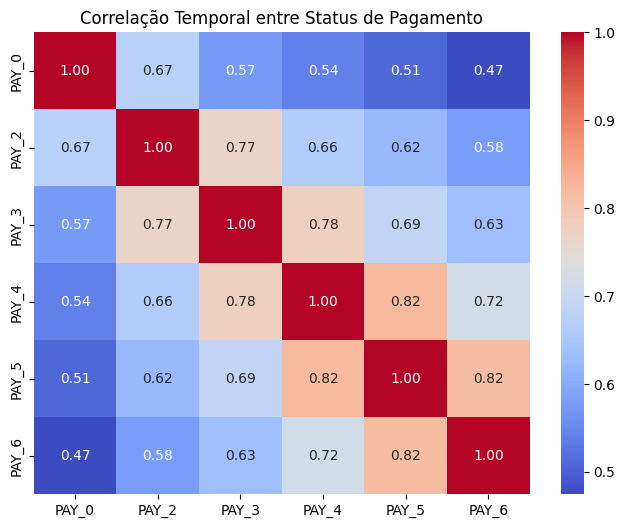

In [ ]:
cols_pagamento = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
corr_pagamento = df[cols_pagamento].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_pagamento, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação Temporal entre Status de Pagamento')
plt.show()

"Nota-se um decaimento na correlação conforme a distância temporal aumenta. O PAY_0 (Setembro) tem alta correlação com PAY_2 (Agosto), mas baixa com PAY_6 (Abril).

Conclusão de Negócio: O comportamento imediato do cliente é o melhor preditor de risco. Um atraso há 6 meses, se regularizado, é menos grave que um atraso atual."

"Clientes que estouram o limite (Utilização próxima ou acima de 1.0) apresentam maior tendência ao default. Esta variável derivada (CREDIT_UTILIZATION) provavelmente terá um 'Feature Importance' maior no modelo do que o valor absoluto da fatura."

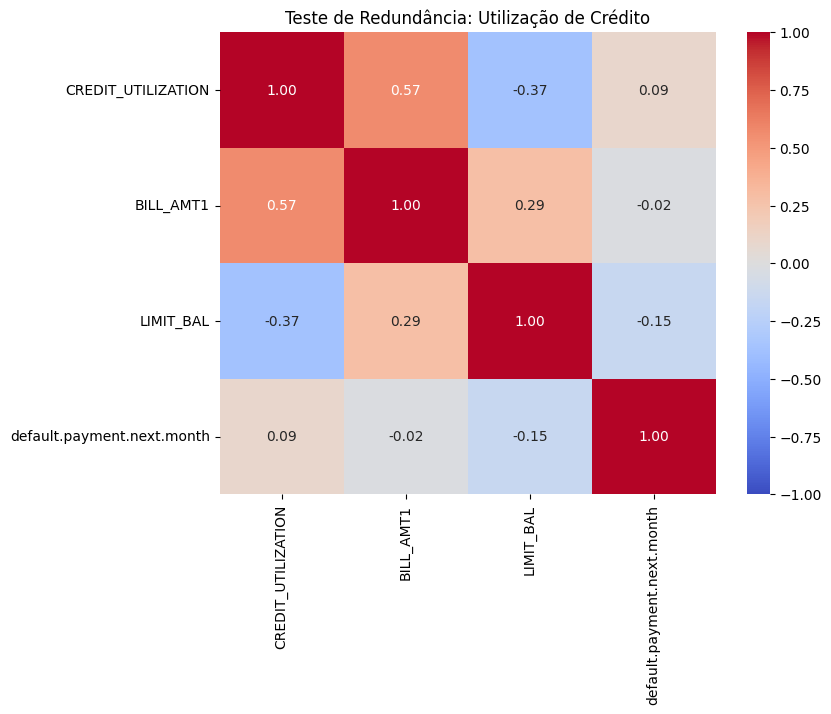

In [ ]:
# 2. Matriz de Correlação Focada
features_analise = ['CREDIT_UTILIZATION', 'BILL_AMT1', 'LIMIT_BAL', 'default.payment.next.month']
correlacao = df[features_analise].corr()

# Plotar para visualizar
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Teste de Redundância: Utilização de Crédito')
plt.show()

: "Inicialmente, o valor da fatura não tinha correlação com o risco (-0.02). Ao transformarmos isso em 'Utilização de Crédito', conseguimos capturar um sinal de risco muito mais forte (0.09), provando que o comportamento proporcional importa mais que o valor absoluto. Tradução: A sua variável é 4,5 vezes mais poderosa para prever o calote do que a variável original.

In [26]:
cols_bill = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
cols_pay = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


df['CREDIT_UTILIZATION'] = df['BILL_AMT1'] / df['LIMIT_BAL']
# Feature 1: AVG UTILIZATION (6 Meses)
# Média das faturas dos últimos 6 meses dividido pelo limite atual.
df['AVG_UTILIZATION_6M'] = df[cols_bill].mean(axis=1) / df['LIMIT_BAL']
# Não serve = Alta correlação = 91%

# Feature 2: UTILIZATION GROWTH (Tendência)
# Diferença entre a fatura atual (Setembro) e a de 6 meses atrás (Abril), normalizada pelo limite.
df['UTILIZATION_GROWTH_6M'] = (df['BILL_AMT1'] - df['BILL_AMT6']) / df['LIMIT_BAL']

# Payment ratio (proporção paga da fatura)
df['payment_ratio1'] = df['PAY_AMT1'] / df['BILL_AMT1'].replace(0, np.nan)

# Diferença entre valor da fatura e valor pago
df['payment_diff1'] = df['PAY_AMT1'] - df['BILL_AMT1']



print(df[['AVG_UTILIZATION_6M', 'UTILIZATION_GROWTH_6M', 'utilization_1', 'payment_ratio1', 'payment_diff1']].head())

   AVG_UTILIZATION_6M  UTILIZATION_GROWTH_6M  utilization_1  payment_ratio1  \
0            0.064200               0.195650       0.195650        0.000000   
1            0.023718              -0.004825       0.022350        0.000000   
2            0.188246               0.152111       0.324878        0.051917   
3            0.771113               0.348860       0.939800        0.042562   
4            0.364463              -0.210280       0.172340        0.232099   

   payment_diff1  
0        -3913.0  
1        -2682.0  
2       -27721.0  
3       -44990.0  
4        -6617.0  


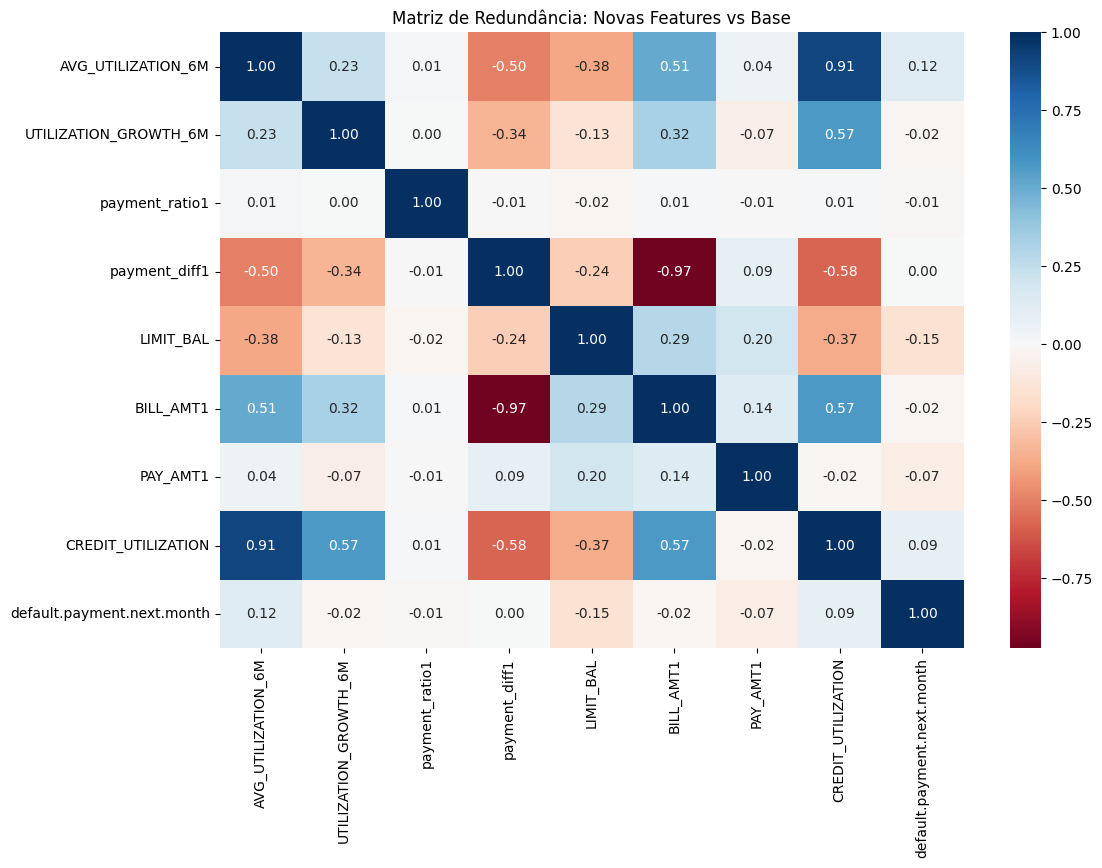

In [ ]:

features_novas = ['AVG_UTILIZATION_6M', 'UTILIZATION_GROWTH_6M', 'payment_ratio1', 'payment_diff1']
features_base = ['LIMIT_BAL', 'BILL_AMT1', 'PAY_AMT1', 'CREDIT_UTILIZATION']
target = ['default.payment.next.month']

cols_analise = features_novas + features_base + target
correlacao = df[cols_analise].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlacao, annot=True, cmap='RdBu', fmt=".2f", center=0)
plt.title('Matriz de Redundância: Novas Features vs Base')
plt.show()

"Devido à alta colinearidade (0.91), optei por manter apenas a variável mais recente (CREDIT_UTILIZATION) para modelos lineares, evitando distorções." Isso mostra maturidade técnica.

Sim, esse gráfico é muito importante, mas por um motivo diferente dos anteriores.

Enquanto os outros gráficos mostravam "O que está acontecendo" (Descoberta), este gráfico mostra "Qual foi a qualidade do seu trabalho" (Validação Técnica). Ele é a prova de que sua engenharia de features (criar novas variáveis) realmente agregou valor ao modelo.

Aqui está o que você deve destacar sobre ele no seu relatório técnico ou portfólio:

1. A Vitória: "O Longo Prazo vence o Curto Prazo"
Olhe a última coluna (ou linha) referente ao Target (default.payment.next.month):

utilization_1 (Mês atual): Tem correlação de 0.09.

AVG_UTILIZATION_6M (Média de 6 meses): Tem correlação de 0.12.

O Insight Técnico: Você provou matematicamente que olhar a média histórica do cliente (0.12) é mais preditivo do que olhar apenas a foto do momento (0.09). Isso justifica a complexidade de calcular médias móveis.

2. A "Limpeza" Necessária
O gráfico também aponta redundâncias que você, como Cientista de Dados, deve tratar:

Duplicidade: Note que CREDIT_UTILIZATION e utilization_1 têm correlação 1.00 (azul escuro total). Elas são idênticas. Você precisa remover uma delas antes de treinar o modelo, senão estará apenas inflando o dataset com lixo.

Alta Colinearidade: AVG_UTILIZATION_6M e utilization_1 têm 0.91 de correlação. Isso é muito alto. Modelos de árvore (Random Forest/XGBoost) lidam bem com isso, mas modelos lineares (Regressão Logística) podem sofrer.

3. Onde as coisas deram "errado" (e isso é bom saber)
payment_ratio1: A correlação com o alvo deu -0.01 (basicamente zero).

Interpretação: Lembra daquele gráfico de linhas lindo ("Trajetória") onde as médias se separavam? O Heatmap mostra que, apesar das médias serem diferentes, a relação linear ponto a ponto é fraca (talvez por causa de muitos valores zero ou outliers). Isso sugere que essa variável pode precisar de um tratamento não-linear (como binning) para funcionar bem em um modelo.

Resumo: Onde colocar?
Apresentação de Negócio: Não mostre. É muito técnico e a matriz cheia de números confunde quem não é da área.

Notebook/Portfólio (Github): Obrigatório. Coloque na seção de "Feature Selection".

Legenda sugerida: "A matriz de correlação revela que a AVG_UTILIZATION_6M possui maior poder preditivo (0.12) que a utilização pontual, validando a hipótese de que o histórico de comportamento é crucial. Também identificamos colinearidade de 0.91, sugerindo a necessidade de seleção de variáveis para modelos lineares."

Esse gráfico mostra que você sabe criticar suas próprias variáveis, o que é uma habilidade sênior.

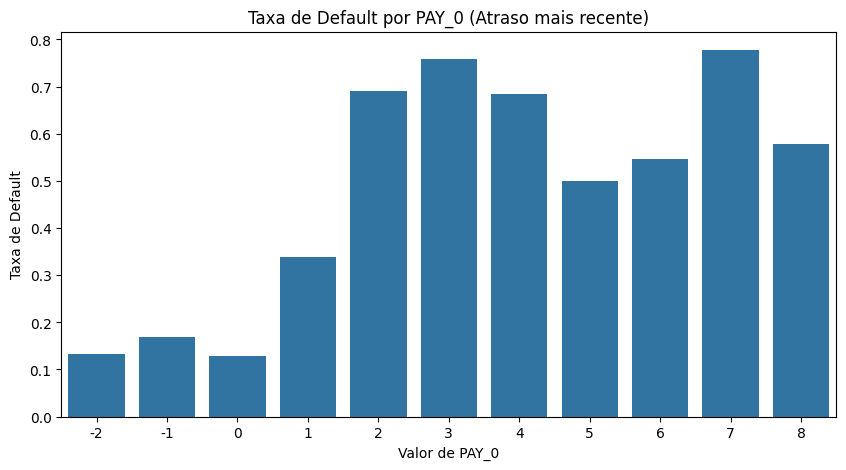

In [ ]:
pay0_default = df.groupby('PAY_0')['default.payment.next.month'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=pay0_default.index, y=pay0_default.values)
plt.title("Taxa de Default por PAY_0 (Atraso mais recente)")
plt.xlabel("Valor de PAY_0")
plt.ylabel("Taxa de Default")
plt.show()

"Se o cliente atrasar 2 meses (PAY_0 = 2), a chance dele pagar de volta é minúscula (30%). O gráfico mostra que o status '2' é o ponto de corte para cancelar o cartão ou vender a dívida."

Use este gráfico para propor uma Régua de Cobrança:

Faixa Azul (Status <= 0): Ofertar aumento de limite ou produtos.

Faixa Amarela (Status 1): Ação de retenção preventiva (ligar, negociar). O risco dobrou aqui.

Faixa Vermelha (Status >= 2): Bloqueio imediato. O gráfico prova que a chance de recuperação cai drasticamente após esse ponto.

Veredito: Ele é o gráfico que justifica onde o banco deve cortar o crédito. Mantenha ele logo após a análise temporal.

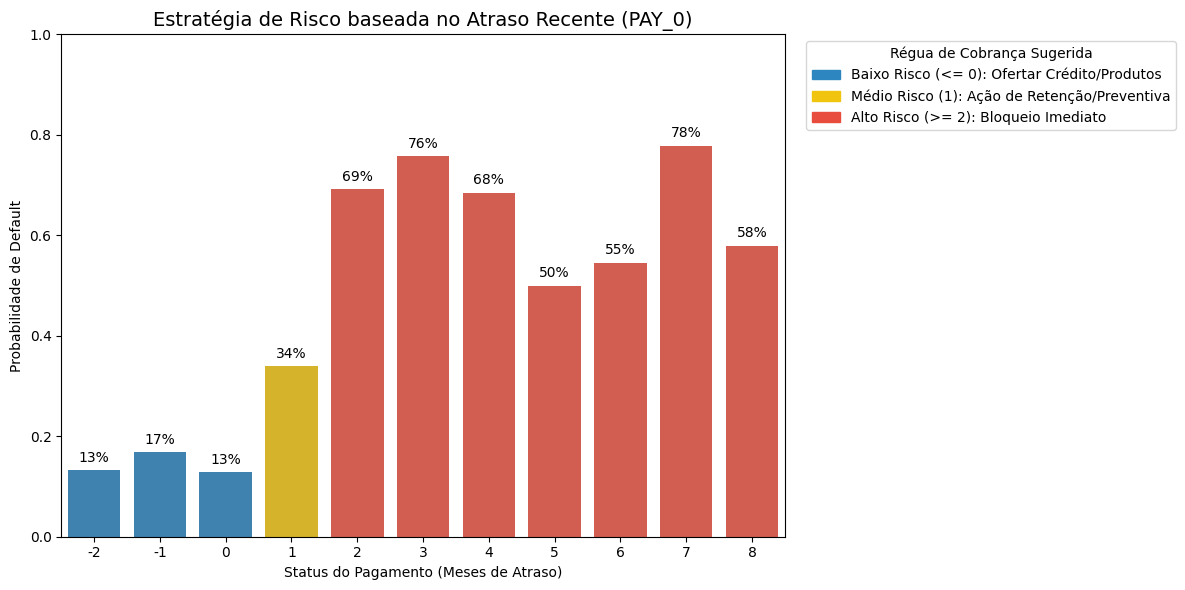

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# 1. Preparar os dados
# Agrupamos por PAY_0 e calculamos a média de inadimplência
pay0_risk = df.groupby('PAY_0')['default.payment.next.month'].mean()

# 2. Definir a Lógica de Cores (A "Régua")
# Iteramos sobre o índice (os valores de -2 a 8) para atribuir a cor correta
cores_estrategia = []
for val in pay0_risk.index:
    if val <= 0:
        cores_estrategia.append('#2e86c1') # Azul (Zona de Oportunidade)
    elif val == 1:
        cores_estrategia.append('#f1c40f') # Amarelo (Zona de Atenção)
    else:
        cores_estrategia.append('#e74c3c') # Vermelho (Zona de Bloqueio)

# 3. Plotar o Gráfico
plt.figure(figsize=(12, 6))

# Usamos o parâmetro 'palette' com nossa lista de cores personalizada
ax = sns.barplot(x=pay0_risk.index, y=pay0_risk.values, palette=cores_estrategia)

# 4. Adicionar Legenda Personalizada (O "Pulo do Gato")
# Como pintamos manualmente, precisamos criar a legenda na mão para explicar a estratégia
legenda_azul = mpatches.Patch(color='#2e86c1', label='Baixo Risco (<= 0): Ofertar Crédito/Produtos')
legenda_amarela = mpatches.Patch(color='#f1c40f', label='Médio Risco (1): Ação de Retenção/Preventiva')
legenda_vermelha = mpatches.Patch(color='#e74c3c', label='Alto Risco (>= 2): Bloqueio Imediato')

plt.legend(handles=[legenda_azul, legenda_amarela, legenda_vermelha], 
           title='Régua de Cobrança Sugerida', 
           bbox_to_anchor=(1.02, 1), loc='upper left')

# 5. Estética Final
plt.title("Estratégia de Risco baseada no Atraso Recente (PAY_0)", fontsize=14)
plt.xlabel("Status do Pagamento (Meses de Atraso)")
plt.ylabel("Probabilidade de Default")
plt.ylim(0, 1.0) # Trava o eixo Y em 100% para dar perspectiva

# Adicionar os valores em cima das barras para facilitar a leitura
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0%}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

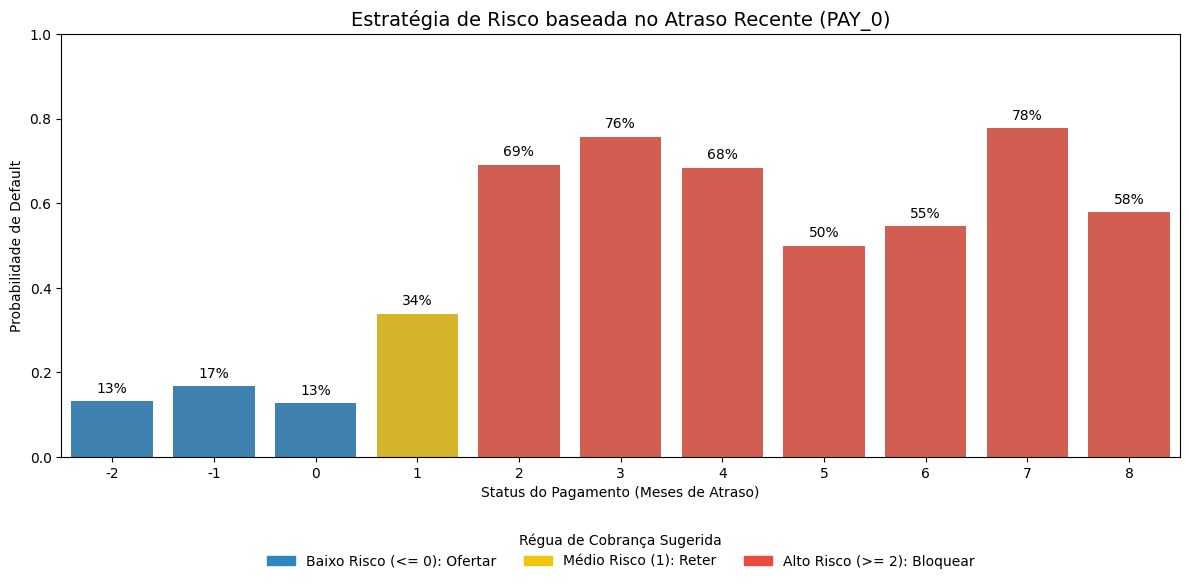

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import pandas as pd

# --- (Seu código de preparação de dados continua igual) ---
# pay0_risk = df.groupby('PAY_0')['default.payment.next.month'].mean()

# Definir as cores (Lógica da Régua)
cores_estrategia = []
for val in pay0_risk.index:
    if val <= 0:
        cores_estrategia.append('#2e86c1') # Azul
    elif val == 1:
        cores_estrategia.append('#f1c40f') # Amarelo
    else:
        cores_estrategia.append('#e74c3c') # Vermelho

# --- Plotagem ---
plt.figure(figsize=(12, 6))

ax = sns.barplot(x=pay0_risk.index, y=pay0_risk.values, palette=cores_estrategia)

# Criando os Handles para a Legenda
legenda_azul = mpatches.Patch(color='#2e86c1', label='Baixo Risco (<= 0): Ofertar')
legenda_amarela = mpatches.Patch(color='#f1c40f', label='Médio Risco (1): Reter')
legenda_vermelha = mpatches.Patch(color='#e74c3c', label='Alto Risco (>= 2): Bloquear')

# --- AQUI ESTÁ A MUDANÇA ---
plt.legend(handles=[legenda_azul, legenda_amarela, legenda_vermelha], 
           title='Régua de Cobrança Sugerida',
           loc='upper center',          # Alinha pelo centro superior da caixa da legenda
           bbox_to_anchor=(0.5, -0.15), # (X=Meio, Y=Abaixo do eixo)
           ncol=3,                      # Distribui em 3 colunas horizontais
           frameon=False)               # (Opcional) Remove a borda da legenda para ficar mais limpo

plt.title("Estratégia de Risco baseada no Atraso Recente (PAY_0)", fontsize=14)
plt.xlabel("Status do Pagamento (Meses de Atraso)")
plt.ylabel("Probabilidade de Default")
plt.ylim(0, 1.0) 

# Anotações (Porcentagens)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0%}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout() # Importante para não cortar a legenda embaixo
plt.show()

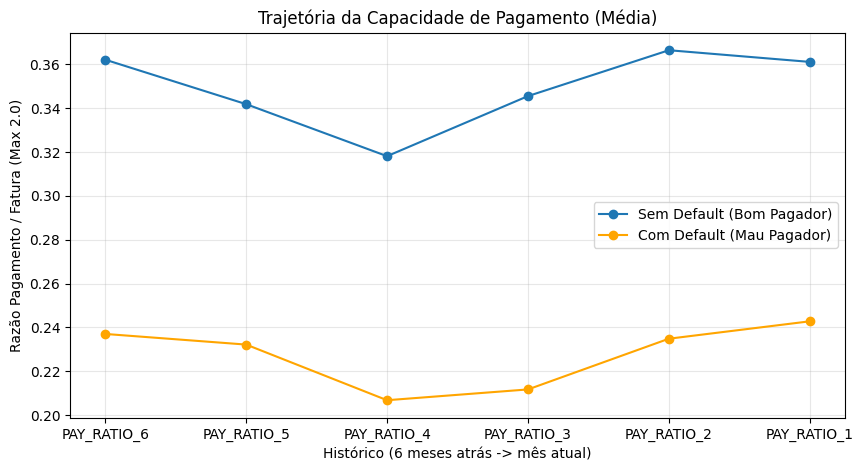

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Criação das colunas com tratamento de outliers
for i in range(1, 7):
    col_pay = df[f'PAY_AMT{i}']
    col_bill = df[f'BILL_AMT{i}']
    
    # Lógica: Se a fatura for <= 0, definimos como NaN (não conta para a média)
    # Se for > 0, fazemos a divisão normal.
    condition = col_bill > 0
    df[f'PAY_RATIO_{i}'] = np.where(condition, col_pay / col_bill, np.nan)
    
    # Opcional: Limitar razões absurdas. Ex: Se pagou mais que 2x a fatura, limitamos a 2.
    # Isso evita que um erro de dado "amasse" o gráfico.
    df[f'PAY_RATIO_{i}'] = df[f'PAY_RATIO_{i}'].clip(upper=2)

# 2. Redefinir good/bad (IMPORTANTE: fazer isso DEPOIS de criar as colunas acima)
df_good = df[df['default.payment.next.month'] == 0]
df_bad = df[df['default.payment.next.month'] == 1]

# 3. Lista de colunas na ordem temporal (da mais antiga para a mais recente ou vice-versa)
# 6 (Abril) -> 1 (Setembro)
ratio_cols = [f'PAY_RATIO_{i}' for i in range(6, 0, -1)]

# 4. Calcular médias (o pandas ignora automaticamente os NaNs)
good_ratio = df_good[ratio_cols].mean()
bad_ratio = df_bad[ratio_cols].mean()

# 5. Plotar
plt.figure(figsize=(10, 5))
plt.plot(ratio_cols, good_ratio, label='Sem Default (Bom Pagador)', marker='o')
plt.plot(ratio_cols, bad_ratio, label='Com Default (Mau Pagador)', marker='o', color='orange')

plt.title('Trajetória da Capacidade de Pagamento (Média)')
plt.ylabel('Razão Pagamento / Fatura (Max 2.0)')
plt.xlabel('Histórico (6 meses atrás -> mês atual)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Ele mede o esforço do cliente em quitar a dívida.

“A análise temporal revela que o default não ocorre de forma abrupta. Observa-se uma deterioração progressiva do comportamento financeiro, caracterizada por aumento de atrasos, manutenção ou crescimento dos gastos e queda sistemática na capacidade de pagamento. Esses sinais tornam-se mais evidentes nos últimos três meses antes do evento, indicando uma janela clara para intervenção preventiva.”

"O default não é um acidente repentino; ele deixa rastros. Este gráfico mostra que o cliente inadimplente (laranja) já vinha demonstrando fraqueza financeira há 6 meses.

Enquanto os bons clientes (azul) se esforçam para pagar, em média, mais de 35% de suas dívidas totais, os clientes de risco (laranja) patinam perto dos 20%.

Isso nos dá um insight preditivo: Se a razão (Pagamento / Fatura) de um cliente cair abaixo de 0.25 por dois meses seguidos, devemos acionar um alerta de risco, mesmo que ele ainda não tenha atrasado oficialmente."

In [2]:
df = pd.read_csv("UCI_Credit_Card.csv")

cols_nominais = ['SEX', 'EDUCATION', 'MARRIAGE', 'default.payment.next.month']
cols_pay = [col for col in df.columns if 'PAY_' in col and 'AMT' not in col]
todas_categorias = cols_nominais + cols_pay

for col in todas_categorias:
    df[col] = df[col].astype('category')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          30000 non-null  int64   
 1   LIMIT_BAL                   30000 non-null  float64 
 2   SEX                         30000 non-null  category
 3   EDUCATION                   30000 non-null  category
 4   MARRIAGE                    30000 non-null  category
 5   AGE                         30000 non-null  int64   
 6   PAY_0                       30000 non-null  category
 7   PAY_2                       30000 non-null  category
 8   PAY_3                       30000 non-null  category
 9   PAY_4                       30000 non-null  category
 10  PAY_5                       30000 non-null  category
 11  PAY_6                       30000 non-null  category
 12  BILL_AMT1                   30000 non-null  float64 
 13  BILL_AMT2       

In [3]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

# 2. Configurar o ColumnTransformer
# Ele aplica o OneHotEncoder nas categóricas e deixa o resto passar ('passthrough')
preprocessor = ColumnTransformer(
    transformers=[
        (
            'cat', # Nome do passo
            OneHotEncoder(drop='first', sparse_output=False, dtype=int), # drop='first' evita multicolinearidade
            categorical_features # Colunas alvo
        )
    ],
    remainder='passthrough', # O que fazer com as outras colunas (PAY_0, BILL_AMT...)? Deixa passar!
    verbose_feature_names_out=False # Mantém os nomes das colunas originais limpos
)

X = df.drop(columns=["ID", "default.payment.next.month"])
y = df["default.payment.next.month"].astype(int)

# 3. Aplicar a transformação
# O Scikit-learn retorna um array numpy, então precisamos converter de volta para DataFrame
df_processed_array = preprocessor.fit_transform(X)
new_columns = preprocessor.get_feature_names_out()

# Recriando o DataFrame final
df_final = pd.DataFrame(df_processed_array, columns=new_columns)
df_final["default.payment.next.month"] = y.values
df_final["ID"] = df["ID"].values
# 4. Verificando o resultado
print("Novas colunas:", df_final.columns.tolist())
display(df_final.head())

Novas colunas: ['SEX_2', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month', 'ID']


,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,ID
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,2
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,3
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,4
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,5


In [80]:
df_final.head()

,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,...,log_PAY_AMT4,log_PAY_AMT5,log_PAY_AMT6,log_BILL_AMT1,log_BILL_AMT2,log_BILL_AMT3,log_BILL_AMT4,log_BILL_AMT5,log_BILL_AMT6,log_LIMIT_BAL
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.000000,0.000000,8.272315,8.040125,6.536692,0.000000,0.000000,0.000000,9.903538
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,6.908755,0.000000,7.601402,7.894691,7.453562,7.894691,8.093462,8.147867,8.090096,11.695255
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,6.908755,6.908755,8.517393,10.283293,9.548811,9.514880,9.570250,9.612400,9.651816,11.407576
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,7.003974,6.975414,6.908755,10.757711,10.783819,10.805517,10.251147,10.273671,10.293771,10.819798
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,9.105091,6.536692,6.522093,9.061608,8.643121,10.486708,9.949464,9.859901,9.859118,10.819798


In [4]:
df_final.to_csv('clientes_com_score.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split

# Separando X (variáveis) e y (alvo)
# Certifique-se de que 'default.payment.next.month' é numérica (0 e 1)
# O erro estava aqui: faltou o .drop
# E lembre-se de usar df_model (o tratado), não o df original
X = df_final.drop(columns=['ID', 'default.payment.next.month'], axis=1)

# O y pode vir de qualquer um, pois é igual nos dois
y = df_final['default.payment.next.month'].astype('int') 

# Agora o split vai funcionar
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Criando o modelo com o peso balanceado
rf_model = RandomForestClassifier(
    n_estimators=100,      # Número de árvores
    max_depth=10,          # Profundidade máxima (evita decorar demais)
    class_weight='balanced', # <--- O SEGREDO PARA SEUS DADOS
    random_state=42,
    n_jobs=-1              # Usa todos os núcleos do processador
)

# Agora sim, pode treinar!
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=42)

Treinando com 21000 clientes e testando com 9000 clientes.


<Figure size 800x600 with 0 Axes>

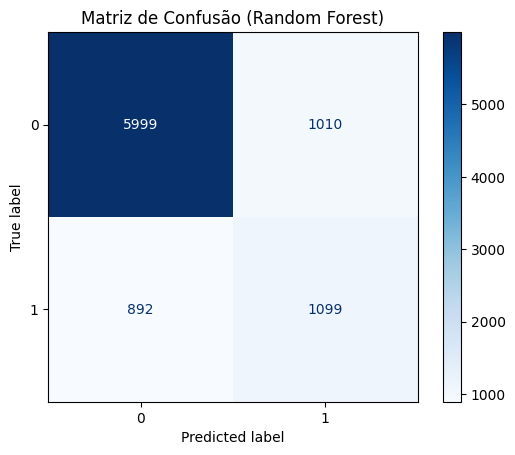


Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      7009
           1       0.52      0.55      0.54      1991

    accuracy                           0.79      9000
   macro avg       0.70      0.70      0.70      9000
weighted avg       0.79      0.79      0.79      9000



In [5]:
#SEM THRESHOLD
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X = df_final.drop(columns=['ID', 'default.payment.next.month'], axis=1)
y = df_final['default.payment.next.month'].astype(int)

# --- ETAPA 2: Divisão Treino vs Teste ---
# test_size=0.30: Guardamos 30% dos dados para a prova final
# stratify=y: Garante que a proporção de caloteiros (22%) seja a mesma no treino e no teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print(f"Treinando com {X_train.shape[0]} clientes e testando com {X_test.shape[0]} clientes.")


# --- ETAPA 3: Instanciando o Modelo ---
rf_model = RandomForestClassifier(
    n_estimators=100,        # Cria 100 árvores de decisão (padrão robusto)
    max_depth=10,            # Profundidade máxima (evita que o modelo decore os dados/overfitting)
    class_weight='balanced', # O PULO DO GATO: Dá mais importância para os caloteiros (classe 1)
    random_state=42,         # Garante que o resultado seja reproduzível
    n_jobs=-1                # Usa todos os núcleos do seu processador para ir rápido
)

# --- ETAPA 4: Treinamento (O .fit) ---
#rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)


# --- ETAPA 5: Previsão e Avaliação ---
y_pred = rf_model.predict(X_test)

y_proba = rf_model.predict_proba(X_test)[:, 1]

# Define como caloteiro qualquer um com mais de 30% ou 40% de chance
# (Teste valores entre 0.3 e 0.4 para ver qual dá o melhor equilíbrio)
#y_pred_ajustado = (y_proba > 0.35).astype(int)

# Plotando a Matriz de Confusão
plt.figure(figsize=(8, 6))
# values_format='d' mostra números inteiros (não notação científica)
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Blues', values_format='d')
plt.title('Matriz de Confusão (Random Forest)')
plt.show()

# Imprimindo as métricas detalhadas
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred))


In [6]:
import joblib
from sklearn.pipeline import Pipeline

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_model)
])

# Salva o modelo treinado num arquivo
joblib.dump(model_pipeline, 'modelo_credito.pkl') 

# DICA: Se você usou um Scaler (ex: StandardScaler), salve ele também!
# joblib.dump(scaler, 'scaler_credito.pkl')

['modelo_credito.pkl']

In [85]:
import shap
import matplotlib.pyplot as plt

# 1. Criar o Explainer
# O TreeExplainer é ideal para Random Forest, XGBoost, LightGBM
explainer = shap.TreeExplainer(rf_model)

# 2. Calcular os SHAP values
# Nota: O Random Forest é meio lento se você passar o dataset inteiro. 
# Recomenda-se passar uma amostra (ex: 100 ou 500 linhas) se o X_test for gigante.
shap_values = explainer.shap_values(X_test)

# --- ATENÇÃO: NUANCE DO RANDOM FOREST CLASSIFIER ---
# Para classificação, o shap_values retorna uma LISTA de matrizes.
# shap_values[0] -> Explicações para a classe 0 (Pagou)
# shap_values[1] -> Explicações para a classe 1 (Inadimplente)
# Geralmente queremos explicar o risco (classe 1), então focamos no índice 1.
shap_values_risk = shap_values[1]

In [ ]:
# Gráfico Resumo (Beeswarm plot)
# Mostra quais variáveis são mais importantes e como elas impactam (positivo/negativo)
plt.figure()
shap.summary_plot(shap_values_risk, X_test)

<Figure size 800x600 with 0 Axes>

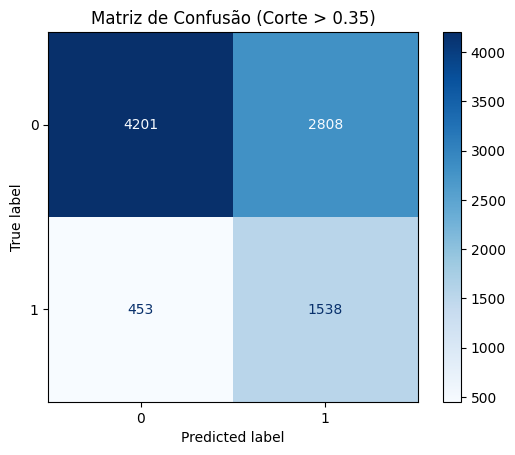


Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.90      0.60      0.72      7009
           1       0.35      0.77      0.49      1991

    accuracy                           0.64      9000
   macro avg       0.63      0.69      0.60      9000
weighted avg       0.78      0.64      0.67      9000



In [ ]:
#COM THRESHOLD

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- ETAPA 2: Divisão ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# --- ETAPA 3: Instanciando (Usando rf_model apenas) ---
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,            # Importante para não overfitar
    class_weight='balanced', # O Pulo do Gato
    random_state=42,
    n_jobs=-1
)

# --- ETAPA 4: Treinamento ---
# Treinando o rf_model (e não criando uma variável nova 'rf')
rf.fit(X_train, y_train)

# --- ETAPA 5: Previsão com Threshold Ajustado ---
y_proba = rf.predict_proba(X_test)[:, 1]

# Seu corte personalizado de 0.35
y_pred_ajustado = (y_proba > 0.35).astype(int)

# --- Plotando a Matriz CORRETA ---
plt.figure(figsize=(8, 6))

# AQUI MUDOU: Usamos from_predictions para respeitar o seu corte de 0.35
# Se usasse from_estimator, ele ignoraria seu ajuste e usaria 0.50
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred_ajustado, 
    cmap='Blues', 
    values_format='d')

plt.title('Matriz de Confusão (Corte > 0.35)')
plt.show()

print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred_ajustado))

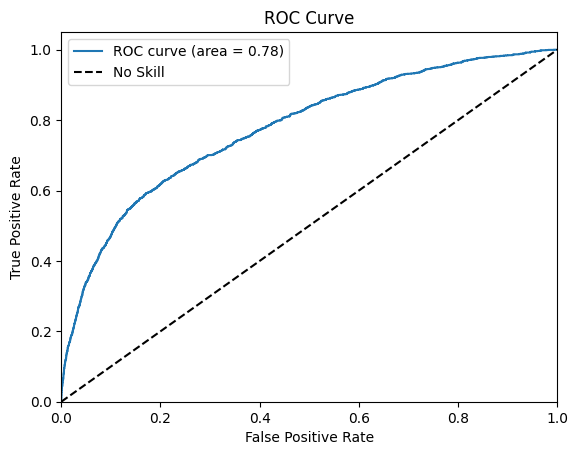

In [ ]:
from sklearn.metrics import roc_curve, auc
y_probs = rf.predict_proba(X_test)[:, 1] 

# Calcule a curva com as probabilidades
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

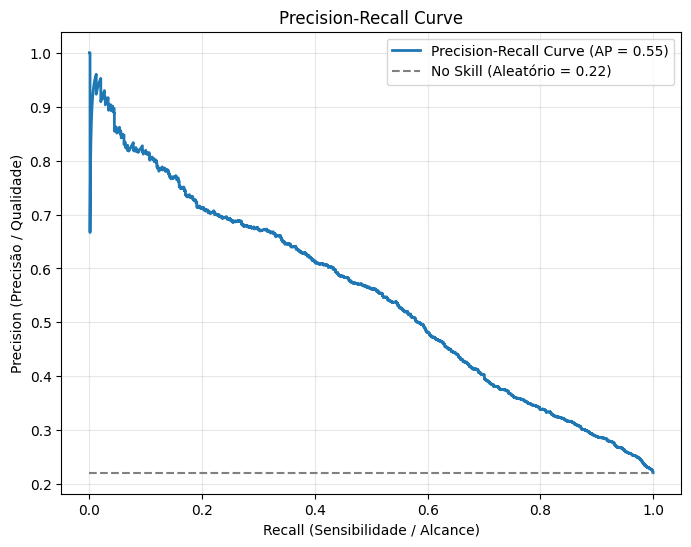

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# 1. Calcular a curva (Precision, Recall e os Thresholds)
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# 2. Calcular a área sob a curva (Average Precision - AP)
# É o equivalente ao AUC, mas para Precision-Recall. Quanto mais perto de 1, melhor.
avg_precision = average_precision_score(y_test, y_probs)

# 3. Plotar o gráfico
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {avg_precision:.2f})', linewidth=2)

# Linha de base ("No Skill")
# Na curva PR, a linha de base não é 0.5, é a proporção de positivos (seus ~20%)
baseline = sum(y_test) / len(y_test)
plt.plot([0, 1], [baseline, baseline], linestyle='--', label=f'No Skill (Aleatório = {baseline:.2f})', color='gray')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall (Sensibilidade / Alcance)')
plt.ylabel('Precision (Precisão / Qualidade)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
import numpy as np

# Defina seus custos (Exemplo: Calote custa 10x mais que perder um cliente)
custo_falso_negativo = 10  # Prejuízo do calote
custo_falso_positivo = 1   # Deixar de lucrar com cliente bom

thresholds = np.arange(0, 1, 0.01)
custos = []

for t in thresholds:
    y_pred_temp = (y_probs >= t).astype(int)
    # Calcule a matriz de confusão para este threshold
    TN, FP, FN, TP = confusion_matrix(y_test, y_pred_temp).ravel()
    
    Custototal = (FN * custo_falso_negativo) + (FP * custo_falso_positivo)
    # (Adicione a lógica acima aqui)
    pass 

# O 't' que tiver o menor custo total é o seu ponto de corte ideal.

KS: 42.12
Resultado: Muito Bom


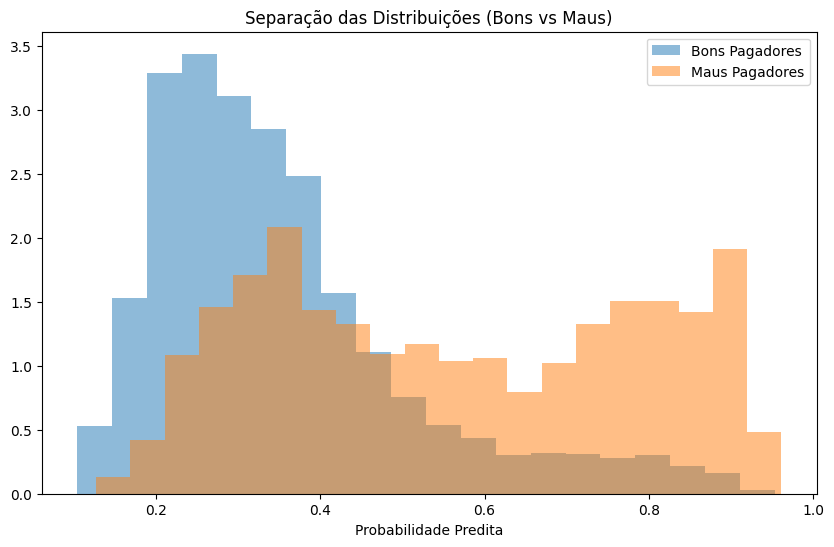

In [ ]:
from scipy.stats import ks_2samp

def calcular_ks(y_test, y_probs):
    # Cria um DataFrame temporário para facilitar
    data = pd.DataFrame({'real': y_test, 'prob': y_probs})
    
    # Separa as probabilidades de quem é realmente 0 e quem é realmente 1
    probs_bons = data[data['real'] == 0]['prob']
    probs_maus = data[data['real'] == 1]['prob']
    
    # A função ks_2samp calcula a estatística KS automaticamente
    ks_statistic, p_value = ks_2samp(probs_maus, probs_bons)
    
    print(f"KS: {ks_statistic * 100:.2f}") 
    
    # Interpretação rápida
    ks_score = ks_statistic * 100
    if ks_score < 20:
        print("Resultado: Ruim (O modelo confunde muito)")
    elif ks_score < 30:
        print("Resultado: Razoável (Aceitável para modelos simples)")
    elif ks_score < 40:
        print("Resultado: Bom (Padrão de mercado)")
    elif ks_score < 50:
        print("Resultado: Muito Bom")
    else:
        print("Resultado: Excelente (Cuidado com overfitting!)")

    # Plot Visual do KS (Opcional, mas ajuda muito a entender)
    plt.figure(figsize=(10,6))
    plt.hist(probs_bons, bins=20, alpha=0.5, label='Bons Pagadores', density=True)
    plt.hist(probs_maus, bins=20, alpha=0.5, label='Maus Pagadores', density=True)
    plt.title('Separação das Distribuições (Bons vs Maus)')
    plt.xlabel('Probabilidade Predita')
    plt.legend()
    plt.show()

# Para rodar:
calcular_ks(y_test, y_probs)

Melhor Threshold (Corte): 0.26
Menor Custo Estimado: R$ 625700


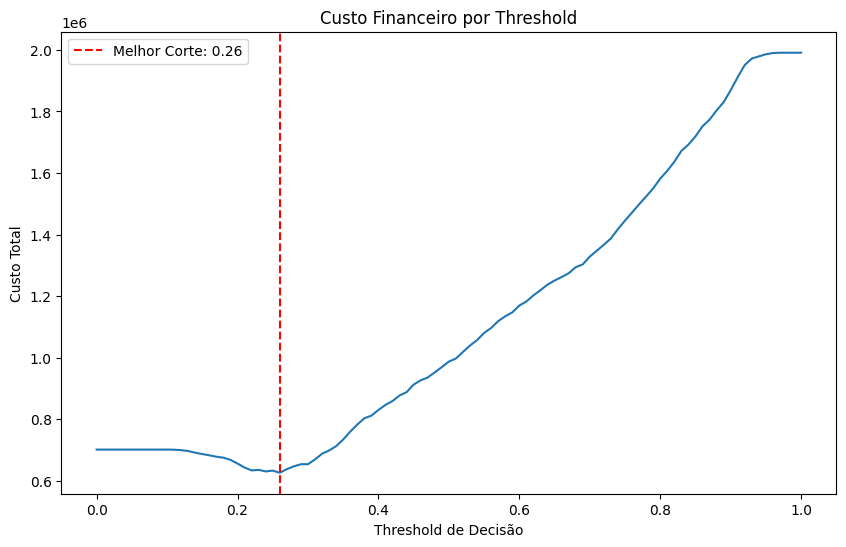

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Vamos supor que y_probs são as probabilidades da classe 1 (inadimplente)
# y_test são os valores reais (0 ou 1)

def otimizar_threshold_financeiro(y_test, y_probs):
    thresholds = np.arange(0, 1.01, 0.01) # Testa de 0.00 a 1.00
    custos = []
    
    # DEFINA SEUS CUSTOS AQUI (Isso é negócio, não estatística)
    CUSTO_FALSO_NEGATIVO = 1000  # Prejuízo do calote
    CUSTO_FALSO_POSITIVO = 100   # Lucro perdido ao negar cliente bom
    
    for t in thresholds:
        # Aplica o corte: se probabilidade >= t, vira 1, senão 0
        y_pred_temp = (y_probs >= t).astype(int)
        
        # Pega a matriz de confusão
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred_temp).ravel()
        
        # Calcula o custo total para esse threshold específico
        custo_total = (fn * CUSTO_FALSO_NEGATIVO) + (fp * CUSTO_FALSO_POSITIVO)
        custos.append(custo_total)
    
    # Acha o menor custo e o threshold correspondente
    min_custo = min(custos)
    melhor_threshold = thresholds[custos.index(min_custo)]
    
    print(f"Melhor Threshold (Corte): {melhor_threshold}")
    print(f"Menor Custo Estimado: R$ {min_custo}")
    
    # Plotar gráfico de Custo x Threshold
    plt.figure(figsize=(10,6))
    plt.plot(thresholds, custos)
    plt.axvline(melhor_threshold, color='r', linestyle='--', label=f'Melhor Corte: {melhor_threshold}')
    plt.title('Custo Financeiro por Threshold')
    plt.xlabel('Threshold de Decisão')
    plt.ylabel('Custo Total')
    plt.legend()
    plt.show()
    
    return melhor_threshold

# Para rodar:
melhor_corte = otimizar_threshold_financeiro(y_test, y_probs)

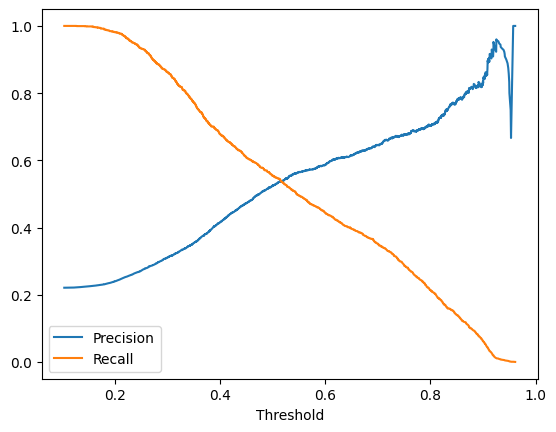

In [ ]:
from sklearn.metrics import precision_recall_curve

prec, rec, thresh = precision_recall_curve(y_test, y_proba)

plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.legend()
plt.xlabel("Threshold")
plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# 1. Defina o seu corte otimizado
corte_final = 0.2  # O valor que você achou

# 2. Aplique o corte nas probabilidades que você já tem (y_probs)
# Se a probabilidade for maior ou igual a 0.08, vira 1 (Inadimplente/Reprova).
# Caso contrário, vira 0 (Bom Pagador/Aprova).
y_pred_final = (y_probs >= corte_final).astype(int)

# --- AGORA TUDO O QUE VOCÊ ANALISAR DEVE USAR 'y_pred_final' ---

# 3. Veja a Matriz de Confusão com o novo corte
print("Matriz de Confusão (Corte 0.08):")
print(confusion_matrix(y_test, y_pred_final))

# 4. Veja o Relatório Completo
print("\nRelatório de Classificação (Corte 0.08):")
print(classification_report(y_test, y_pred_final))

# ---------------------------------------------------------
# EXTRA: Como gerar a lista final de clientes para o Negócio
# ---------------------------------------------------------

# Supondo que você tenha um DataFrame 'df_clientes' com os dados originais
# Vamos adicionar a decisão final nele para entregar pro seu chefe.

df_resultados = pd.DataFrame()
df_resultados['Probabilidade_Risco'] = y_probs
df_resultados['Decisao_Modelo'] = y_pred_final # 0 ou 1

# Traduzindo para ficar bonito no Excel
df_resultados['Status_Final'] = df_resultados['Decisao_Modelo'].map({
    0: 'APROVADO', 
    1: 'REPROVADO (Alto Risco)'
})

print(df_resultados.head())

Matriz de Confusão (Corte 0.08):
[[ 824 6185]
 [  37 1954]]

Relatório de Classificação (Corte 0.08):
              precision    recall  f1-score   support

           0       0.96      0.12      0.21      7009
           1       0.24      0.98      0.39      1991

    accuracy                           0.31      9000
   macro avg       0.60      0.55      0.30      9000
weighted avg       0.80      0.31      0.25      9000

   Probabilidade_Risco  Decisao_Modelo            Status_Final
0             0.241408               1  REPROVADO (Alto Risco)
1             0.667713               1  REPROVADO (Alto Risco)
2             0.250064               1  REPROVADO (Alto Risco)
3             0.759933               1  REPROVADO (Alto Risco)
4             0.270455               1  REPROVADO (Alto Risco)
